Load and preprocess dataset

In [1]:
import pathlib
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = next((pathlib.Path.cwd().parent / "reddit-sentiment").glob("*.csv"))
df = pl.read_csv(dataset_path)

df = df.with_column((pl.col("year") + "-" + pl.col("day")).str.strptime(pl.Date, "%Y-%-j").alias("date"))

In [2]:
df

year,day,subreddit,avg_polarity,avg_subjectivity,count,date
i64,i64,str,f64,f64,i64,date
2005,346,"""reddit.com""",0.057076,0.314484,76,2005-12-12
2005,352,"""reddit.com""",0.058499,0.36306,34,2005-12-18
2005,356,"""reddit.com""",0.116115,0.439753,70,2005-12-22
2005,357,"""reddit.com""",0.130695,0.347144,94,2005-12-23
2005,358,"""reddit.com""",0.113289,0.410132,92,2005-12-24
2005,359,"""reddit.com""",0.116408,0.428773,94,2005-12-25
2005,360,"""reddit.com""",0.088694,0.430825,76,2005-12-26
2005,361,"""reddit.com""",0.110789,0.392905,114,2005-12-27
2005,362,"""reddit.com""",0.146001,0.436374,122,2005-12-28


Inspect the number of subreddits over time

In [3]:
df.groupby("year").agg(pl.n_unique("subreddit")).sort("year")

year,subreddit
i64,u32
2005,1
2006,34
2007,46
2008,2695
2009,6157
2010,11789
2011,26519
2012,58445
2013,87592


Number of total posts on reddit over time

<AxesSubplot: xlabel='date', ylabel='count'>

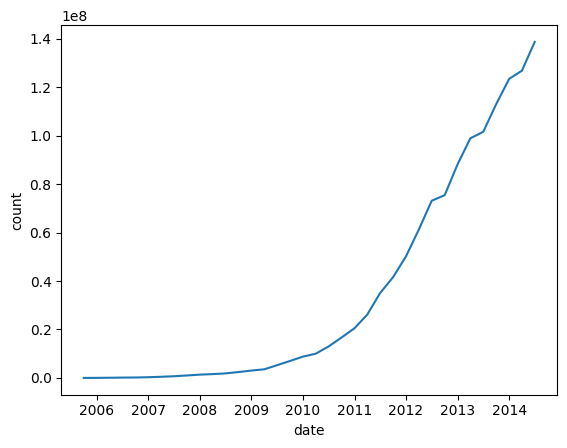

In [4]:
monthly_count = df.groupby_dynamic("date", every="3mo").agg(pl.sum("count"))
sns.lineplot(data=monthly_count, x="date", y="count")

How steady are subreddits over time? Do we have the same number of posts every day?

<AxesSubplot: xlabel='date', ylabel='total_std'>

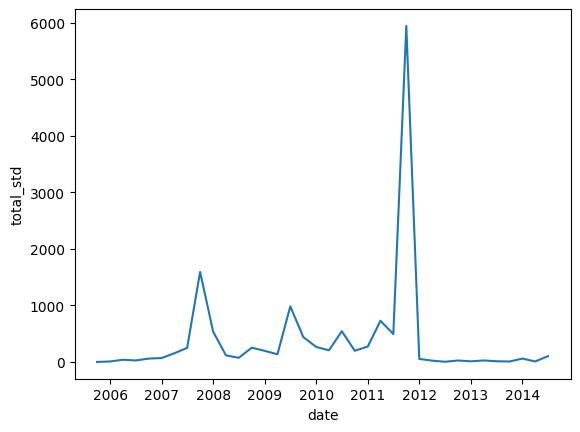

In [5]:
std_subreddit_per_month = df.groupby_dynamic("date", by="subreddit", every="1mo").agg(pl.col("count").std())
std_total_per_quarter = std_subreddit_per_month.drop("subreddit").groupby_dynamic("date", every="3mo").agg(pl.col("count").std().alias("total_std"))

sns.lineplot(data=std_total_per_quarter, x="date", y="total_std")

Identify the most popular subreddits over time, which will come in handy later

In [6]:
subreddits_by_count = df.groupby("subreddit").agg(pl.col("count").sum().alias("total_count")).sort(by="total_count", reverse=True)
top_reddits = subreddits_by_count.select("subreddit").limit(10)["subreddit"].to_list()
top_reddits

['AskReddit',
 'funny',
 'pics',
 'gaming',
 'WTF',
 'AdviceAnimals',
 'leagueoflegends',
 'politics',
 'videos',
 'IAmA']

Plot polarity over time

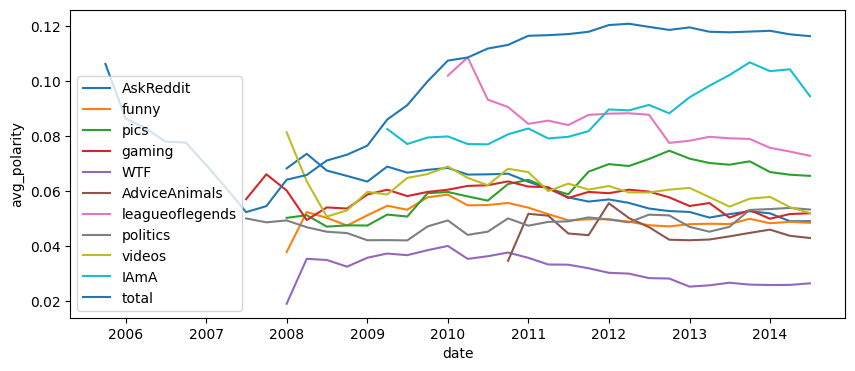

In [7]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)


for subreddit in top_reddits:
    subreddit_df = df.filter(pl.col("subreddit") == subreddit).groupby_dynamic("date", every="3mo").agg(pl.col("avg_polarity").mean())
    ax = sns.lineplot(data=subreddit_df, x="date", y="avg_polarity", ax=ax, label=subreddit)

total_df = df.groupby_dynamic("date", every="3mo").agg(pl.col("avg_polarity").mean())
ax = sns.lineplot(data=total_df, x="date", y="avg_polarity", ax=ax, label="total")
plt.legend(loc='best')
plt.show()

Plot subjectiveness over time

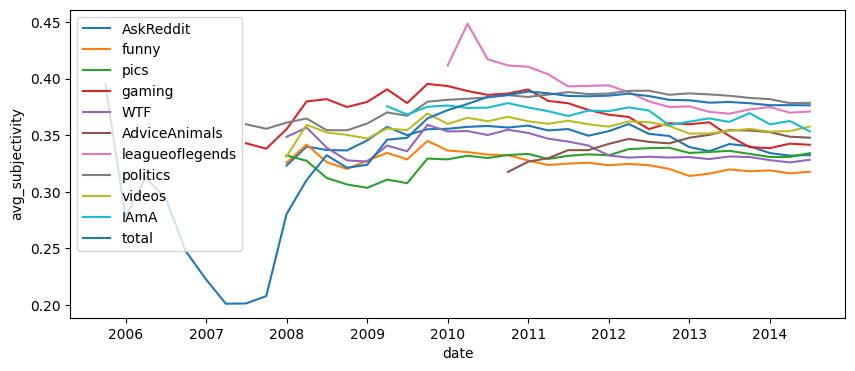

In [8]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)


for subreddit in top_reddits:
    subreddit_df = df.filter(pl.col("subreddit") == subreddit).groupby_dynamic("date", every="3mo").agg(pl.col("avg_subjectivity").mean())
    ax = sns.lineplot(data=subreddit_df, x="date", y="avg_subjectivity", ax=ax, label=subreddit)

total_df = df.groupby_dynamic("date", every="3mo").agg(pl.col("avg_subjectivity").mean())
ax = sns.lineplot(data=total_df, x="date", y="avg_subjectivity", ax=ax, label="total")
plt.legend(loc='best')
plt.show()

How much variance is there for polarity?

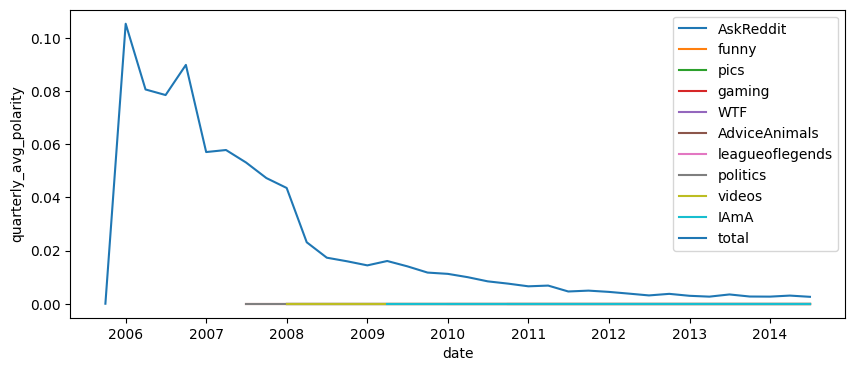

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

for subreddit in top_reddits:
    std_total_per_quarter = df.filter(pl.col("subreddit") == subreddit)\
    .groupby_dynamic("date", every="1m")\
    .agg(pl.col("avg_polarity").std().alias("monthly_avg_polarity"))\
    .groupby_dynamic("date", every="3mo")\
    .agg(pl.col("monthly_avg_polarity").std().alias("quarterly_avg_polarity"))
    ax = sns.lineplot(data=std_total_per_quarter, x="date", y="quarterly_avg_polarity", ax=ax, label=subreddit)

std_total_per_quarter = df\
    .groupby_dynamic("date", every="1m")\
    .agg(pl.col("avg_polarity").std().alias("monthly_avg_polarity"))\
    .groupby_dynamic("date", every="3mo")\
    .agg(pl.col("monthly_avg_polarity").std().alias("quarterly_avg_polarity"))
ax = sns.lineplot(data=std_total_per_quarter, x="date", y="quarterly_avg_polarity", ax=ax, label="total")
plt.legend(loc='best')
plt.show()

How much variance is there for subjectivity?

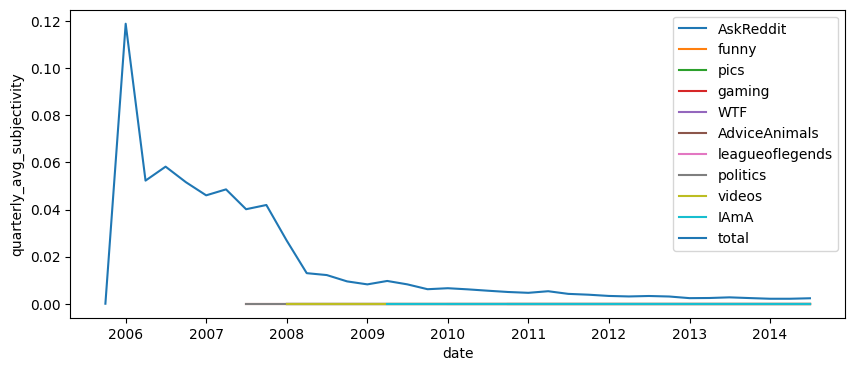

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

for subreddit in top_reddits:
    std_total_per_quarter = df.filter(pl.col("subreddit") == subreddit)\
    .groupby_dynamic("date", every="1m")\
    .agg(pl.col("avg_subjectivity").std().alias("monthly_avg_subjectivity"))\
    .groupby_dynamic("date", every="3mo")\
    .agg(pl.col("monthly_avg_subjectivity").std().alias("quarterly_avg_subjectivity"))
    ax = sns.lineplot(data=std_total_per_quarter, x="date", y="quarterly_avg_subjectivity", ax=ax, label=subreddit)

std_total_per_quarter = df\
    .groupby_dynamic("date", every="1m")\
    .agg(pl.col("avg_subjectivity").std().alias("monthly_avg_subjectivity"))\
    .groupby_dynamic("date", every="3mo")\
    .agg(pl.col("monthly_avg_subjectivity").std().alias("quarterly_avg_subjectivity"))
ax = sns.lineplot(data=std_total_per_quarter, x="date", y="quarterly_avg_subjectivity", ax=ax, label="total")
plt.legend(loc='best')
plt.show()